In [36]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 100)

# 지수 표기법 일부 제한
plt.rcParams['axes.formatter.useoffset'] = False  # 오프셋 사용 안 함
plt.rcParams['axes.formatter.limits'] = (0, 10)  # 이 범위 밖의 숫자는 과학 표기법을 사용

# 판다스 지수표기법 제한
def custom_float_format(x):
    if x == int(x):
        return f'{x:.0f}'
    else:
        return f'{x:.3f}'

pd.set_option('display.float_format', custom_float_format)

import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn palette
sns.color_palette('tab10')

# Matplotlib의 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False



In [63]:
data = pd.read_excel('preprocessed_data_txt-sum.xlsx')

In [64]:
data.sample(3)

,유형1,유형2,보험명,보장금액,월 보험료,기본 보험료,할증 보험료,그룹,보장기간,납입기간(년),갱신여부,총 보험료,보장 대비 보험료,scaled보대보,보장 발생,보장 횟수,내용 요약
40,진단,암,유사암진단 납입지원,66000,488,488,NaN,NaN,20년만기,20,납,117120,1.775,2.146,"기타피부암, 갑상선암, 대장점막내암, 제자리암, 경계성종양",발생 이후 이 계약의 보험료 납입시마다,"특정암 진단 시 차회 이후 이 계약의 보험료 납입시마다 가입금액 일부로 납입 지원,..."
9,수술,질병,111대질병 수술비(22대주요질병),1000000,704,482,222,NaN,100세만기,20,납,168960,0.169,0.204,22대 주요질병,수술당 1회,"22대 주요질병 수술 시 가입금액 지급, 1년 미만 50% 감액"
18,진단,갑상선,갑상선기능항진증 치료비,2000000,260,260,NaN,NaN,100세만기,20,납,62400,0.031,0.037,갑상선기능항진증,최초 1회한,"""갑상선기능항진증"" 진단 후 치료 시 가입금액 지급"


## 시각화
#### 유형 별 [보장금액, 월 보험료, 총 보험료, 보장대비 보험료]

1. 기본 그래프 그리기 
2. 필요한 데이터 추가하기 
    1. 개수
    2. 

C:\Users\kyeul\AppData\Local\Temp\ipykernel_16268\3148727033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='유형1', y='보장금액', ax=axs[0, 0], palette='tab10', errorbar=None)


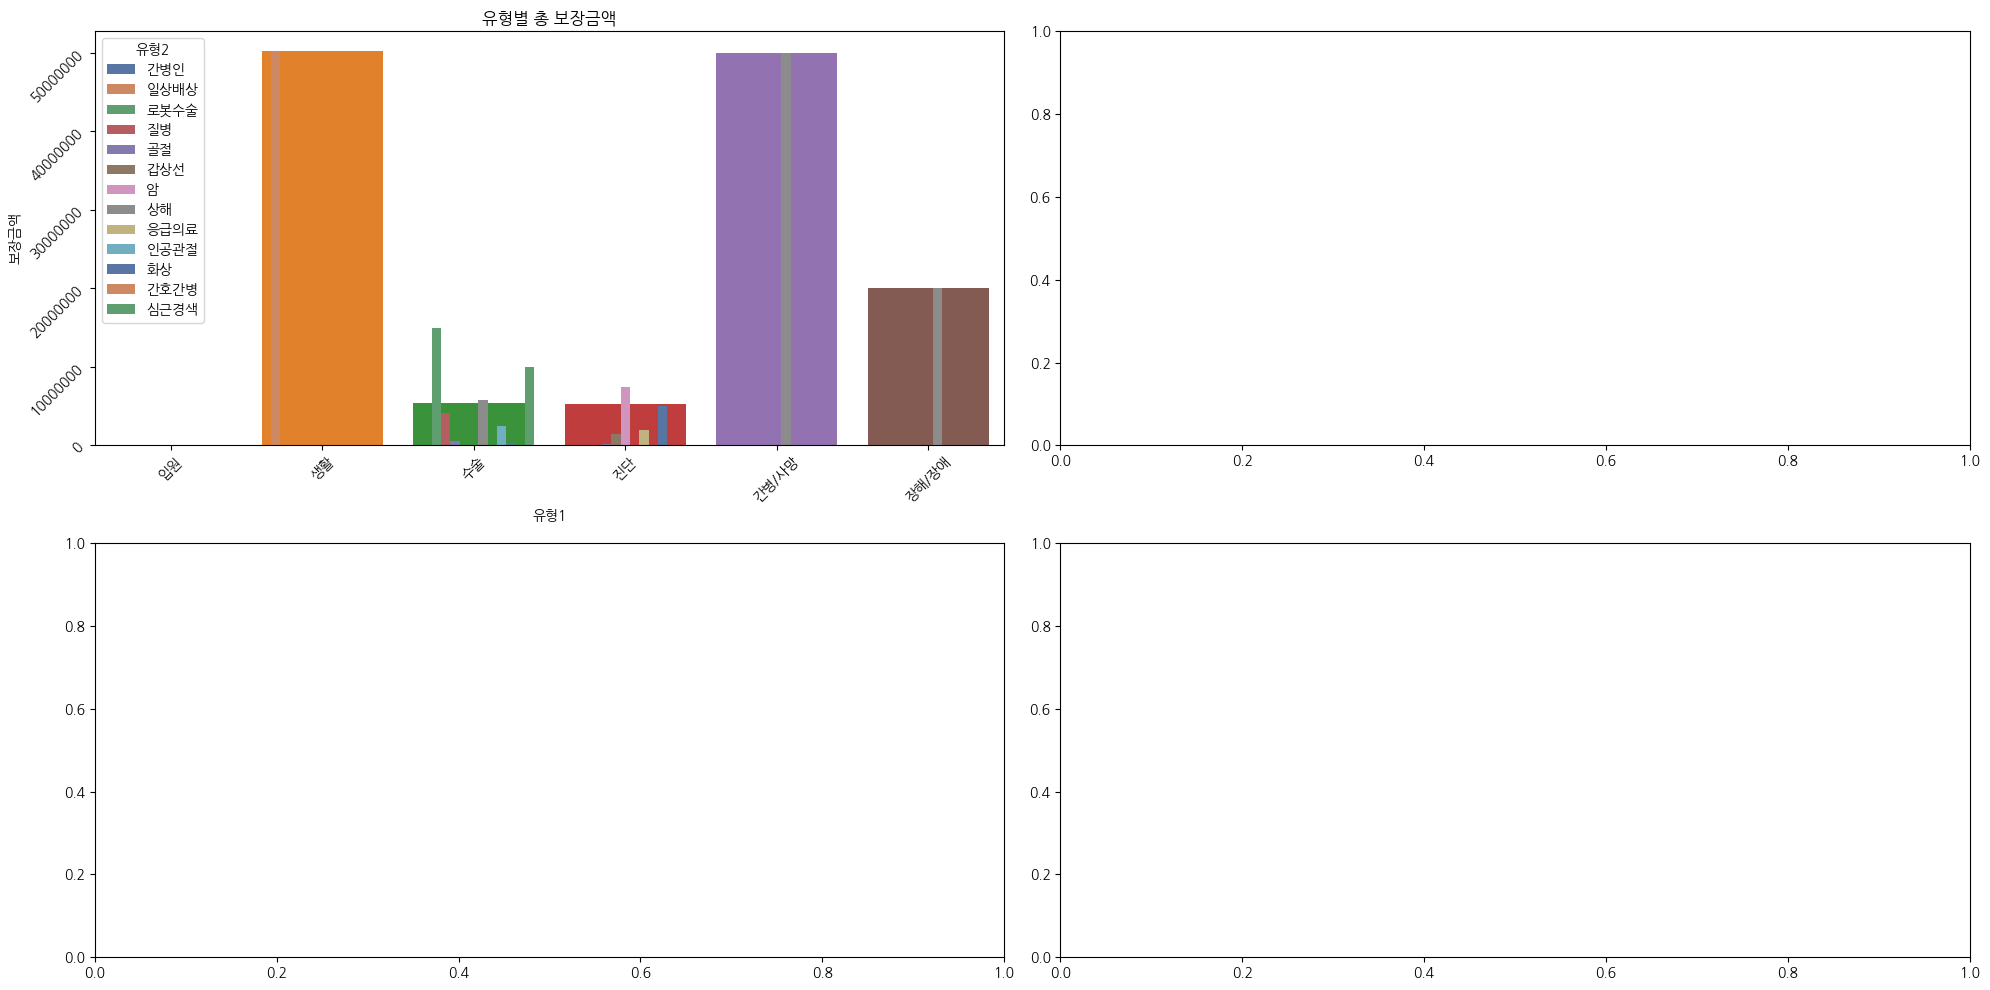

In [85]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# 보장금액
sns.barplot(data=data, x='유형1', y='보장금액', ax=axs[0, 0], palette='tab10', errorbar=None)
sns.barplot(data=data, x='유형1', y='보장금액', hue='유형2', ax=axs[0, 0], palette='deep', errorbar=None)
axs[0, 0].set_title('유형별 총 보장금액')
axs[0, 0].tick_params(rotation=45)

plt.tight_layout()
plt.show()